In [1]:
import pandas as pd 
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

tqdm.pandas()

In [2]:

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bezatezera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bezatezera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/bezatezera/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bezatezera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv("/Users/bezatezera/Desktop/Data/amazonSales/Amazon_sales_analytics/data/reviews.csv")
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,review_id,user_id,product_id,review_title,review_content
0,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [4]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_id       1465 non-null   object
 1   user_id         1465 non-null   object
 2   product_id      1465 non-null   object
 3   review_title    1465 non-null   object
 4   review_content  1465 non-null   object
dtypes: object(5)
memory usage: 57.4+ KB
None
review_id         0
user_id           0
product_id        0
review_title      0
review_content    0
dtype: int64


In [5]:
def clean_text(text):

    #check if the text is a string
    text = str(text).lower()

    #remove URLS
    text = re.sub(r'http\S+|www\S+', '', text)

    #remove HTML tags
    text = re.sub(r'<.*?>','',text)

    #remove punctuation and npn-alphabetic chars
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    #tokenize
    tokens = nltk.word_tokenize(text)

    #remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]

    return " ".join(tokens)

In [6]:
print("Cleaning text data ...")
df['cleaned_review'] = df['review_content'].progress_apply(clean_text)
print("Text cleaning complete!")

Cleaning text data ...


100%|██████████| 1465/1465 [00:03<00:00, 383.45it/s]

Text cleaning complete!


In [7]:
df[['review_content', 'cleaned_review']].head(10)

,review_content,cleaned_review
0,Looks durable Charging is fine tooNo complains...,look durable charging fine toono complainschar...
1,I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...
2,"Not quite durable and sturdy,https://m.media-a...",quite durable sturdy good nice productworking ...
3,"Good product,long wire,Charges good,Nice,I bou...",good productlong wirecharges goodnicei bought ...
4,"Bought this instead of original apple, does th...",bought instead original apple work fast apple ...
5,"It's a good product.,Like,Very good item stron...",good productlikevery good item strong useful u...
6,Build quality is good and it is comes with 2 y...,build quality good come year warrantygood prod...
7,Worth for money - suitable for Android auto......,worth money suitable android auto purpose serv...
8,I use this to connect an old PC to internet. I...,use connect old internet tried lubuntu ubuntu ...
9,I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...


In [8]:
df['cleaned_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['cleaned_length'].describe()

count    1465.000000
mean      127.652560
std       166.196437
min         6.000000
25%        45.000000
50%        76.000000
75%       128.000000
max      1676.000000
Name: cleaned_length, dtype: float64

In [17]:
output_path = 'cleaned_reviews.csv'
df.to_csv(output_path, index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


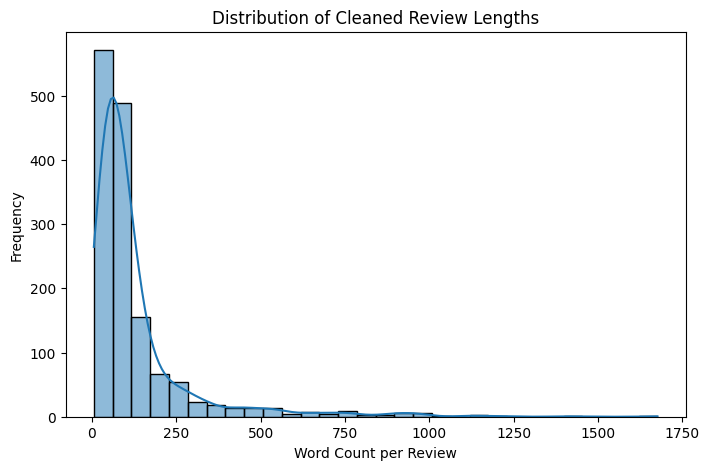

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['cleaned_length'], bins=30, kde=True)
plt.title("Distribution of Cleaned Review Lengths")
plt.xlabel("Word Count per Review")
plt.ylabel("Frequency")
plt.savefig("../results/visualization/cleaned_review_length_distribution.png")
plt.show()
